<div class='alert-block alert-info'>
    <br>
    <h1 align="center"><b>  Lab session 5 :</b> Reinforcement Learning: Dynamic Programming </h1>
    <h3 align="center">Artificial Intelligence Algorithms </h3>
    <h5 align="center">MESIIN476024</a></h5>
    <br>
</div>

#### **Session Outline:**
This session is structured into two distinct parts:

1.	**MDP-RL Focus (1.5 hours):** Dive into key concepts and applications of Markov Decision Processes and Reinforcement Learning.
2.	**Project Work (1.5 hours):** The second half will be dedicated to making progress on the ongoing project.  Final lab session will be dedicated to project presentations.

<h1 align="left"> <font color='darkblue'><b> A. MDP-RL Focus </b></font></a></h1>  

This tutorial introduces the foundational concepts and practical implementation of Markov Decision Processes (MDPs) and Reinforcement Learning (RL), leveraging **OpenAI Gym** to build hands-on experience. This part is divided into multiple sections to progressively explore the topic, culminating in practical exercises to solidify understanding.




<h2 align="left"> <font color='darkblue'><b> 1. Introduction to Gymnasium API </b></font></a></h2>  

Gymnasium, a maintained fork of OpenAI Gym ([https://gymnasium.farama.org](https://gymnasium.farama.org)), is a Python library designed to provide a diverse collection of environments for reinforcement learning (RL) experiments through a unified interface. The central concept in Gymnasium is the **environment** (`Env` class), which encapsulates the functionality and capabilities required for RL tasks.

---

<h3 align="left"> <b> a. Key Features of Gymnasium Environments </b></h3>  

Every Gymnasium environment provides the following key pieces of information and functionality:

- **Action Space:** Defines the set of allowable actions that an agent can take. Gymnasium supports:
  - **Discrete actions** (e.g., selecting from a finite number of options).
  - **Continuous actions** (e.g., choosing a value within a range).
  - **Combined spaces** for more complex setups.

- **Observation Space:** Describes the shape and boundaries of the information (state) provided to the agent about the environment.

- **Methods:**
  - `step(action)`: Executes an action in the environment and returns:
    - The current **observation** (new state).
    - The **reward** for the action taken.
    - A **terminated** flag indicating if the episode has ended successfully.
    - A **truncated** flag indicating if the episode ended due to a time limit or other criteria.
    - An **info** dictionary containing additional information (optional).
  - `reset()`: Resets the environment to its initial state and returns the first observation along with additional **info**.

- **Environment Naming Convention:**  
  Each Gymnasium environment has a unique name following the `EnvironmentName-vX` format, where `X` denotes the version number. Versions distinguish between updates or modifications in the environment, such as bug fixes or significant changes.

- For more details, refer to the documentation website at [gymnasium.farama.org](https://gymnasium.farama.org) or the package information on  [pypi.org/project/gymnasium](https://pypi.org/project/gymnasium).
---

<h3 align="left"> <b> b. Creating an Environment </b></h3>  

To create an environment, Gymnasium provides the `make(env_name)` function, which takes the environment’s name as a string. For example:


In [1]:
'''Make sure that Gymnasium is already installed, or install it using the following command:'''

!pip install gymnasium

In [3]:
import gymnasium as gym
import random 
import matplotlib.pyplot as plt
import time  # For measuring execution time
import numpy as np

# Create the FrozenLake-v1 environment with rendering enabled
env = gym.make("FrozenLake-v1", render_mode="rgb_array")

Let's look at the frozen lake environment using the render function and matplotlib library:

Initial frame


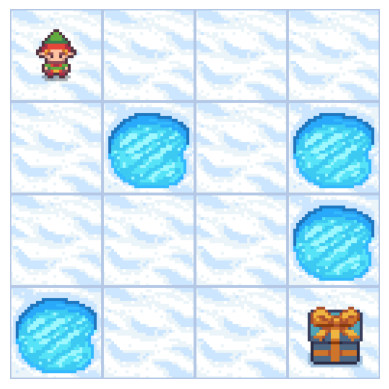

In [4]:
# Reset the environment to its initial state
observation, info = env.reset()

# Function to display the rendered frame
def display_frame(env):
    frame = env.render()  # Get the RGB array of the current frame
    plt.imshow(frame)
    plt.axis("off")  # Hide axes for better visualization
    plt.show()

# Display the initial frame
print("Initial frame")
display_frame(env)


As we can see, our agent starts in cell $(0, 0)$, and its goal is to reach cell $(3, 3)$ while avoiding the hole cells scattered across the grid. In the next section, we will explore in more detail the various components of a Gymnasium environment and the information it contains.

To get an overview of the different environments available in Gymnasium and explore one of them, you can use the following code. It retrieves and lists all the available environments in the Gymnasium library, along with the total number of environments currently supported.

In [5]:
from gymnasium import envs

# Get all environments and count them
all_envs = envs.registry.keys()
num_envs = len(all_envs)

print("Number of environments:", num_envs)

print("----")
# Print each environment name
for env_name in all_envs:
    print(env_name)

Number of environments: 62
----
CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
phys2d/CartPole-v0
phys2d/CartPole-v1
phys2d/Pendulum-v0
LunarLander-v3
LunarLanderContinuous-v3
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v3
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
tabular/Blackjack-v0
tabular/CliffWalking-v0
Reacher-v2
Reacher-v4
Reacher-v5
Pusher-v2
Pusher-v4
Pusher-v5
InvertedPendulum-v2
InvertedPendulum-v4
InvertedPendulum-v5
InvertedDoublePendulum-v2
InvertedDoublePendulum-v4
InvertedDoublePendulum-v5
HalfCheetah-v2
HalfCheetah-v3
HalfCheetah-v4
HalfCheetah-v5
Hopper-v2
Hopper-v3
Hopper-v4
Hopper-v5
Swimmer-v2
Swimmer-v3
Swimmer-v4
Swimmer-v5
Walker2d-v2
Walker2d-v3
Walker2d-v4
Walker2d-v5
Ant-v2
Ant-v3
Ant-v4
Ant-v5
Humanoid-v2
Humanoid-v3
Humanoid-v4
Humanoid-v5
HumanoidStandup-v2
HumanoidStandup-v4
HumanoidStandup-v5
GymV21Environment-v0
GymV26Environment-v0


<h2 align="left"> <font color='darkblue'><b> 2. Understanding and Exploring the FrozenLake-v1 Environment  </b></font></h2>  

The **FrozenLake-v1** environment is a classic reinforcement learning task where an agent must navigate across a frozen grid to reach a goal. The grid world contains several types of terrain that affect the agent's movement and rewards.

![FrozenLake Example Layout](images/Frozen_Lake.png)



In [6]:
import gymnasium as gym
# Create the FrozenLake-v1 environment with rendering enabled
env = gym.make("FrozenLake-v1", render_mode="rgb_array")

<h3 align="left"> <b> a. Grid Description</b></h3>  
The environment consists of a grid (visible in the figure), with the following cell types:
- **Start (S)**: The agent starts at cell \((0, 0)\).
- **Frozen (F)**: Safe cells where the agent can move freely without penalty.
- **Hole (H)**: Dangerous cells; if the agent steps here, the episode ends with zero reward.
- **Goal (G)**: The treasure cell; reaching this cell ends the episode with a positive reward.

The agent's objective is to navigate from the **Start** to the **Goal** while avoiding the **Holes**. The environment's layout is defined by an $n \times n$ grid, which can vary in size depending on the specific configuration. For a **4x4 FrozenLake grid**, the state indices are as follows:

|       | **0**  | **1**  | **2**  | **3**  |
|-------|--------|--------|--------|--------|
| **0** | 0  | 1  | 2  | 3  |
| **1** | 4  | 5  | 6  | 7  |
| **2** | 8  | 9  | 10 | 11 |
| **3** | 12 | 13 | 14 | 15 |


In [7]:
# Create the FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=True)

# Get the total number of states
num_states = env.observation_space.n # Discrete(16) (4x4 grid)

# Display the set of states
layout = env.unwrapped.desc
print("State Mapping with Grid Layout:")
for i, row in enumerate(layout):
    mapped_row = [f"{cell.decode('utf-8')}({i*4+j})" for j, cell in enumerate(row)]
    print(" ".join(mapped_row))

# Close the environment
env.close()

State Mapping with Grid Layout:
S(0) F(1) F(2) F(3)
F(4) H(5) F(6) H(7)
F(8) F(9) F(10) H(11)
H(12) F(13) F(14) G(15)


**Evironment Layout:**

``` python
    S F F F
    F H F H
    F F F H
    H F F G

In [8]:
# Create the FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=True)

# Access the layout of the environment
layout = env.unwrapped.desc

# Print the layout
print("FrozenLake Layout:")
for row in layout:
    print(" ".join(cell.decode("utf-8") for cell in row))  # Decode bytes to strings

# Close the environment
env.close()

FrozenLake Layout:
S F F F
F H F H
F F F H
H F F G


---
<h3 align="left"> <b> b. Set of Actions</b></h3> 

The agent in the environment has four possible moves — Up, Down, Left and Right.
  - **0**: Move **left**  <-.
  - **1**: Move **down**  ↓.
  - **2**: Move **right**  ->.
  - **3**: Move **up**  ↑.


Action Space: Discrete(4)
Performed action: ← (0)


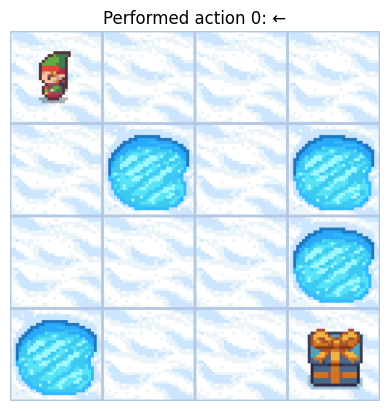

Performed action: ↓ (1)


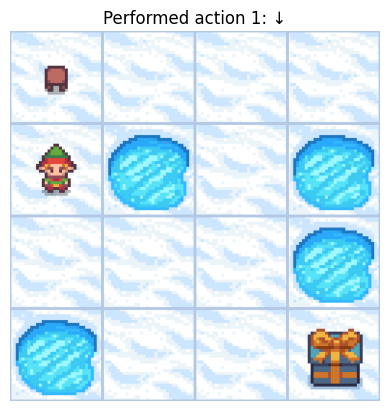

Performed action: → (2)


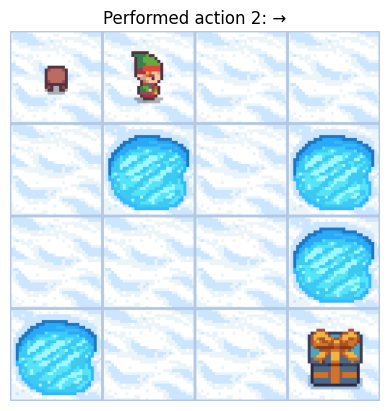

Performed action: ↑ (3)


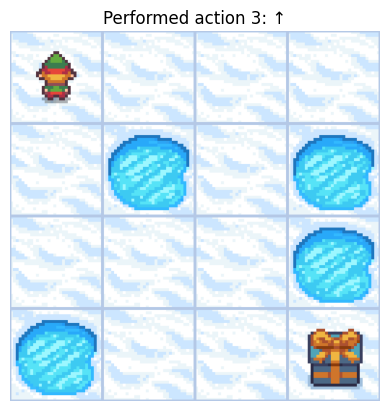

In [9]:
# Action Space:
print("Action Space:", env.action_space)

# Map actions to directions
actions_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}

# Create the FrozenLake-v1 environment with rendering enabled
env = gym.make("FrozenLake-v1", render_mode="rgb_array",  is_slippery=False)

# Reset the environment to its initial state
env.reset()

# Function to display the rendered frame
def display_frame(env, action=None):
    frame = env.render()  # Get the RGB array of the current frame
    plt.imshow(frame)
    plt.axis("off")  # Hide axes for better visualization
    if action is not None:
        plt.title(f"Performed action {action}: {actions_map[action]}")  # Display the action
    plt.show()

# Take each possible action in the environment and display the result
for action in range(4):
    observation, info = env.reset()
    print(f"Performed action: {actions_map[action]} ({action})")  # Display action number and description
    observation, reward, terminated, truncated, info = env.step(action)  # Take the action
    display_frame(env, action)  # Display the rendered frame
# Close the environment
env.close()

---
<h3 align="left"> <b> c. Stochastic Action Dynamics</b></h3> 

The **FrozenLake** environment introduces stochasticity to simulate the slippery nature of ice.  The agent's actions do not always result in the expected movement. Instead, the transitions are probabilistic:

- $P(0.333)$: The agent moves in the intended direction.
- $P(0.333)$: The agent moves at a 90° angle to the intended direction (either left or right).
- $P(0.333)$: The agent moves in the opposite direction.

This behavior makes navigation challenging, as the agent must account for the inherent uncertainty in its actions.


**Example:**

The following diagram illustrates the stochastic dynamics:

<div style="text-align: center;">
    <img src="images/Stochastic_Dynamics.png" width="400" />
</div>

- From **state 6**, when taking **action 0** (move left):
  - There is a **0.33 probability** of transitioning to **state 2**, with a reward of **0.0**. The transition is **non-terminal**.
  - There is a **0.33 probability** of transitioning to **state 5**, with a reward of **0.0**. The transition is **terminal**, and the MDP ends.
  - There is a **0.33 probability** of transitioning to **state 10**, with a reward of **0.0**. The transition is **non-terminal**.



This stochastic behavior increases the complexity of the environment, as the agent cannot always predict its exact position after an action. Consequently, it requires the agent to develop a robust and adaptable policy that considers the probabilities of all possible outcomes and maximize its chances of reaching the goal while minimizing the risks of falling into a hole.

In [10]:
# Create FrozenLake environment with custom grid
env = gym.make("FrozenLake-v1",  is_slippery=True)


**Note on Dynamics (`is_slippery`)**

1.	**is_slippery=True:**
    - Actions are stochastic, meaning the agent might slip into an unintended cell.
	- Adds complexity and randomness to the environment.
2.	**is_slippery=False:**
	- Actions are deterministic, and the agent moves exactly as intended.

In [11]:
# Access the raw environment object
raw_env = env.unwrapped

for prob, next_state, reward, done in raw_env.P[0][1]:  # Example: State 0, Action 1
    print(f"Transition Probability[{0}][{next_state}]: {prob}")

Transition Probability[0][0]: 0.3333333333333333
Transition Probability[0][4]: 0.3333333333333333
Transition Probability[0][1]: 0.3333333333333333


---
<h3 align="left"> <b> d. Reward System</b></h3> 

The reward system in **FrozenLake** is sparse:
- **0** for each step, regardless of the type of cell (no penalty for frozen cells or movement through the grid).
- **0** for falling into a hole (**H**), ending the episode immediately.
- **1** for reaching the goal (**G**), ending the episode successfully.

This sparse reward structure forces the agent to optimize its policy by learning from successful attempts to reach the goal.

In [12]:
state = 14  # Example current state
rewards = {}

for action in raw_env.P[state]:
    rewards[action] = []
    for prob, next_state, reward, done in raw_env.P[state][action]:
        rewards[action].append((next_state, reward))  # Include next_state index

print(f"Rewards for state {state}:")
for action, transitions in rewards.items():
    print(f"  Action {action}:")
    for next_state, reward in transitions:
        print(f"    Next State: {next_state}, Reward: {reward}")

Rewards for state 14:
  Action 0:
    Next State: 10, Reward: 0.0
    Next State: 13, Reward: 0.0
    Next State: 14, Reward: 0.0
  Action 1:
    Next State: 13, Reward: 0.0
    Next State: 14, Reward: 0.0
    Next State: 15, Reward: 1.0
  Action 2:
    Next State: 14, Reward: 0.0
    Next State: 15, Reward: 1.0
    Next State: 10, Reward: 0.0
  Action 3:
    Next State: 15, Reward: 1.0
    Next State: 10, Reward: 0.0
    Next State: 13, Reward: 0.0


<h3 style="color: darkred;"><b>Exercice1: Your Turn to Explore</b></h3>

Now, it's up to you to explore the **FrozenLake** environment and extract meaningful insights by writing code snippets. Use the following questions as a guide to analyze and understand the dynamics of the environment.

1. **Initial State**: Display the initial state of the environment. Understand where the agent starts on the grid and how it maps to the state space.

2. **Next States**: Retrieve and examine the possible next states after taking a specific action in a given state. For example, explore how actions like `←`, `↓`, `→`, and `↑` affect the agent's position on the grid. 

3. **Episode Termination (`done`)**: Determine whether an episode ends after a particular state transition. This will help identify terminal states, such as falling into a hole or reaching the goal.

4. **Episode Information**: Extract and track details about the current episode, including:
	-	Cumulative rewards.
	-	Total steps taken.
	-	Whether the episode was completed successfully or terminated early.

5. **Random/Greedy Policy**: Implement a random or greedy policy (e.g., always move right), and observe its performance.
6. **Close the environment**: Ensure the environment is closed properly after your exploration to release resources.

For more details, refer to the table below and revisit the links to the **Gymnasium documentation** mentioned at the beginning of this notebook. These resources provide additional context, explanations, and examples to support your exploration and understanding.

### 1. Initial State

In [13]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
print(env.observation_space)

Discrete(16)


There are 16 states in our problem, let's now look where the agent starts on the grid and how it maps to the state space.

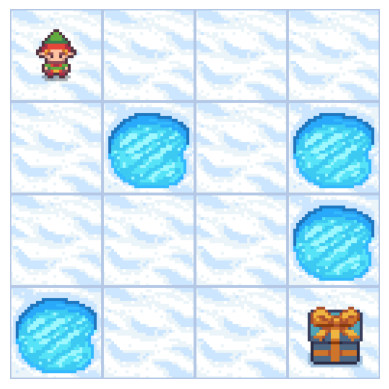

In [14]:
env.reset()
image = env.render() # Allow to have the rgb matrix of our system
plt.imshow(image)
plt.axis('off')  # Hide axes for better clarity
plt.show()

We can find 3 types of states : the goal one, the water ones/holes ones (make you loose), and the normal states

### 2. Next States

Action Space: Discrete(4)
Performed action: ← (0)


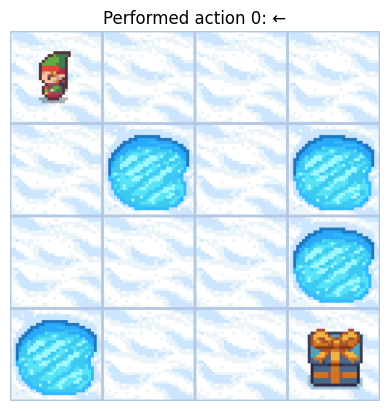

Performed action: ↓ (1)


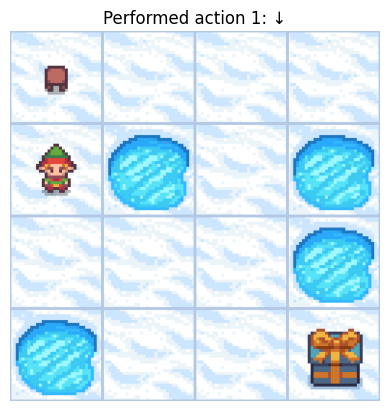

Performed action: → (2)


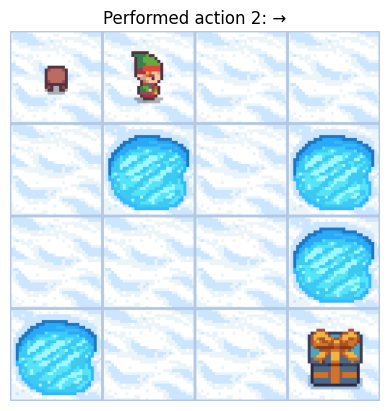

Performed action: ↑ (3)


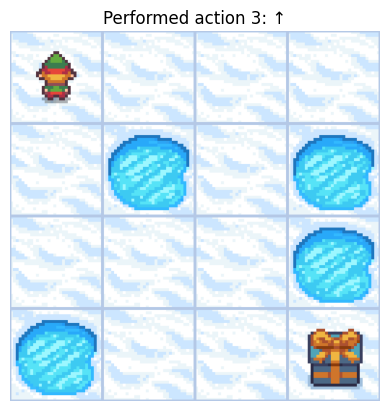

In [ ]:
# Action Space:
print("Action Space:", env.action_space)

# Map actions to directions
actions_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}

# Create the FrozenLake-v1 environment with rendering enabled
env = gym.make("FrozenLake-v1", render_mode="rgb_array",  is_slippery=False)

# Reset the environment to its initial state
env.reset()

# Function to display the rendered frame
def display_frame(env, action=None):
    """
    Visualizes the current state of the environment and optionally displays the action taken by the agent.

    Parameters:
    - env: The environment object (e.g., a Gym environment), which should have a `render()` method that returns the current frame.
    - action: Optional parameter. If provided, it will display the action performed by the agent in the plot's title.
      
    Output:
    - Displays the current frame of the environment as an image.
    - If an action is provided, the plot's title will include the action taken.
    """
    frame = env.render()  # Get the RGB array of the current frame
    plt.imshow(frame)
    plt.axis("off")  # Hide axes for better visualization
    if action is not None:
        plt.title(f"Performed action {action}: {actions_map[action]}")  # Display the action
    plt.show()

# Take each possible action in the environment and display the result
for action in range(4):
    observation, info = env.reset()
    print(f"Performed action: {actions_map[action]} ({action})")  # Display action number and description
    
    observation, reward, terminated, truncated, info = env.step(action)  # Take the action
    display_frame(env, action)  # Display the rendered frame
# Close the environment
env.close()
     
    


We use the action map that links a number and a direction to understand easier the different actions the systems can do. Thus the action are  1 of these numbers : 0,1,2 and 3

### 3. Episode Termination

In [16]:
# Map actions to directions
actions_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}

# Create the FrozenLake-v1 environment with rendering enabled
env = gym.make("FrozenLake-v1", render_mode="rgb_array",  is_slippery=False)

# Reset the environment to its initial state
env.reset()


# Take each possible action in the environment and display the result
for action in range(4):
    observation, info = env.reset()
    print(f"Performed action: {actions_map[action]} ({action})")  # Display action number and description
    
    observation, reward, terminated, truncated, info = env.step(action)  # Take the action
    if(terminated):
        print("You reached the goal\n")
    else :
        print("Need to continue looking :)\n")
    
# Close the environment
env.close()
     

Performed action: ← (0)
Need to continue looking :)

Performed action: ↓ (1)
Need to continue looking :)

Performed action: → (2)
Need to continue looking :)

Performed action: ↑ (3)
Need to continue looking :)



We now have created a small code that will tell if by doing an action from a given postion we have reached the goal state.

### 4. Episode Information

In [17]:
# Map actions to directions
actions_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}

# Create the FrozenLake-v1 environment with rendering enabled
env = gym.make("FrozenLake-v1", render_mode="rgb_array",  is_slippery=False)
# Reset the environment to its initial state
env.reset()


# Take each possible action in the environment and display the result
for action in range(4):
    observation, info = env.reset()
    print(f"Performed action: {actions_map[action]} ({action})")  # Display action number and description
    
    observation, reward, terminated, truncated, info = env.step(action)  # Take the action
    print(f"Observation: {observation},truncated: {truncated}, Reward: {reward}, Done: {terminated}, Info : {info}")
    if(terminated):
        print("You reached the goal\n")
    else :
        print("Need to continue looking :)\n")
    
# Close the environment
env.close()
     

Performed action: ← (0)
Observation: 0,truncated: False, Reward: 0.0, Done: False, Info : {'prob': 1.0}
Need to continue looking :)

Performed action: ↓ (1)
Observation: 4,truncated: False, Reward: 0.0, Done: False, Info : {'prob': 1.0}
Need to continue looking :)

Performed action: → (2)
Observation: 1,truncated: False, Reward: 0.0, Done: False, Info : {'prob': 1.0}
Need to continue looking :)

Performed action: ↑ (3)
Observation: 0,truncated: False, Reward: 0.0, Done: False, Info : {'prob': 1.0}
Need to continue looking :)



It's the same things than above but this time we are displaying some relevant information of our action ( the Reward, the probability of our move for the action, and the next state)

### 5. Random/Greedy Policy

In [18]:
def display_frame(env, action=None):
    """
    Visualizes the current state of the environment and optionally displays the action taken by the agent.

    Parameters:
    - env: The environment object (e.g., a Gym environment), which should have a `render()` method that returns the current frame.
    - action: Optional parameter. If provided, it will display the action performed by the agent in the plot's title.
      
    Output:
    - Displays the current frame of the environment as an image.
    - If an action is provided, the plot's title will include the action taken.
    """
    frame = env.render()  # Get the RGB array of the current frame
    plt.imshow(frame)
    plt.axis("off")  # Hide axes for better visualization
    if action is not None:
        plt.title(f"Performed action {action}: {actions_map[action]}")  # Display the action
    plt.show()

Step 0: Action 1, Observation 4, Reward 0.0


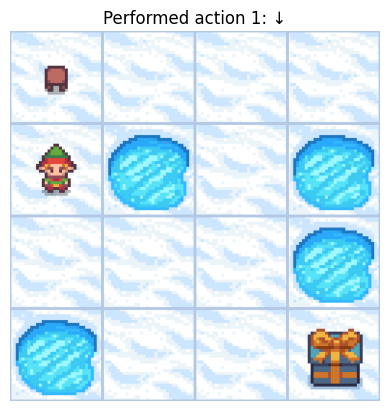

Step 1: Action 3, Observation 0, Reward 0.0


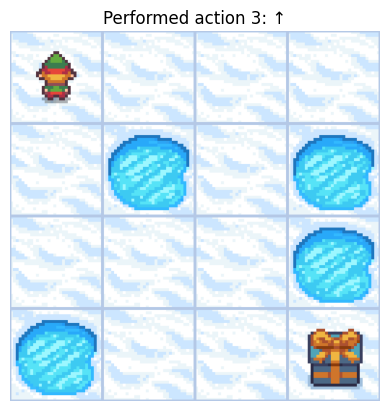

Step 2: Action 1, Observation 4, Reward 0.0


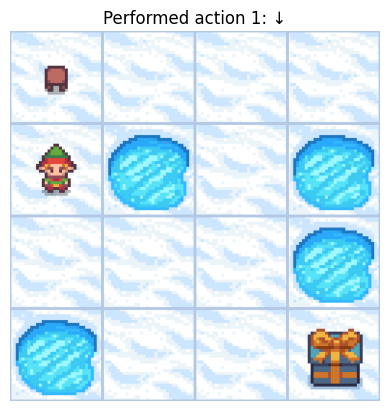

Step 3: Action 3, Observation 0, Reward 0.0


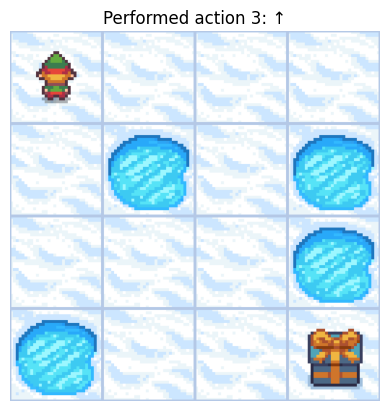

Step 4: Action 3, Observation 0, Reward 0.0


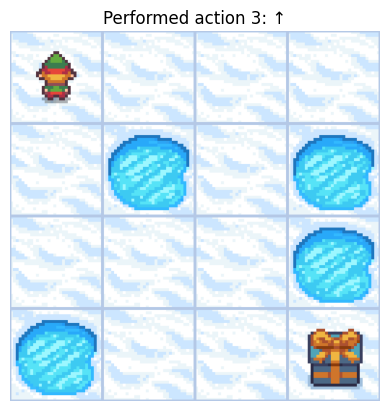

Step 5: Action 3, Observation 0, Reward 0.0


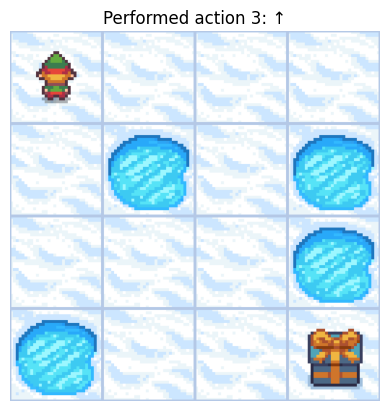

Step 6: Action 0, Observation 0, Reward 0.0


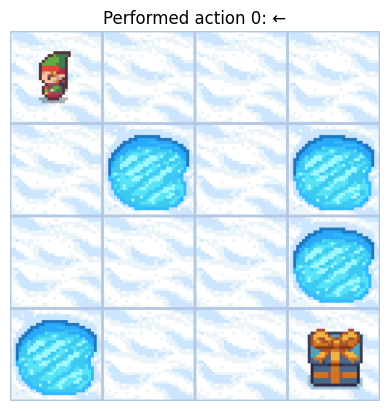

Step 7: Action 1, Observation 4, Reward 0.0


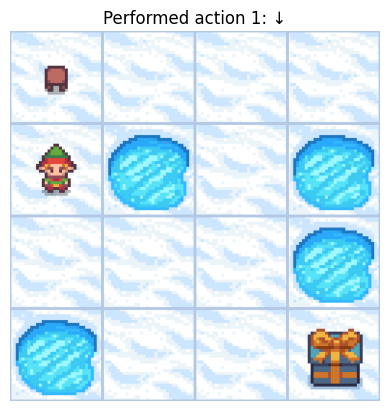

Step 8: Action 0, Observation 4, Reward 0.0


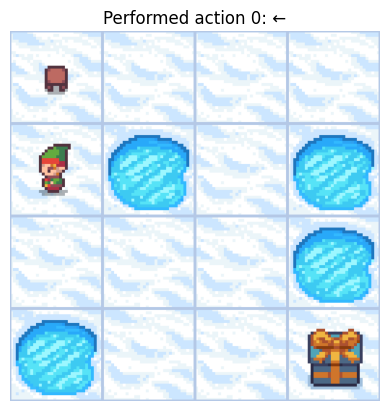

Step 9: Action 0, Observation 4, Reward 0.0


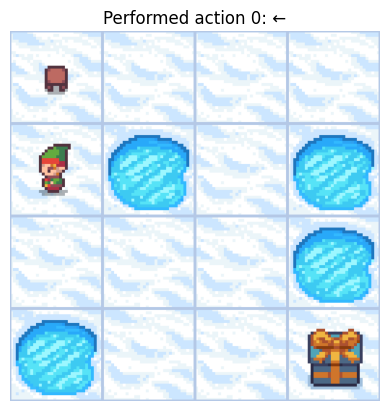

Step 10: Action 3, Observation 0, Reward 0.0


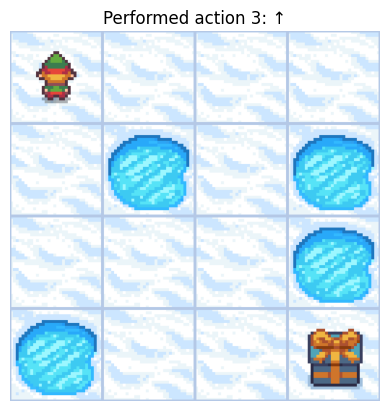

Step 11: Action 3, Observation 0, Reward 0.0


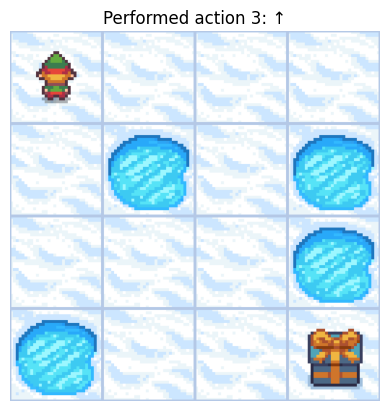

Step 12: Action 0, Observation 0, Reward 0.0


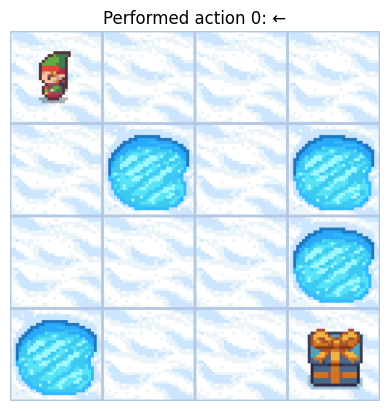

Step 13: Action 2, Observation 1, Reward 0.0


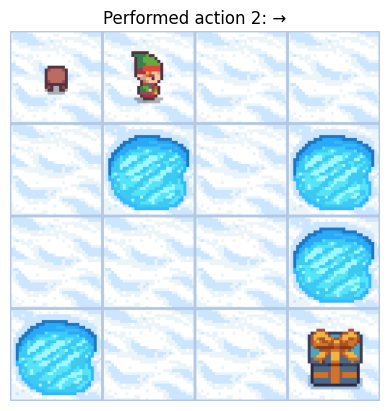

Step 14: Action 2, Observation 2, Reward 0.0


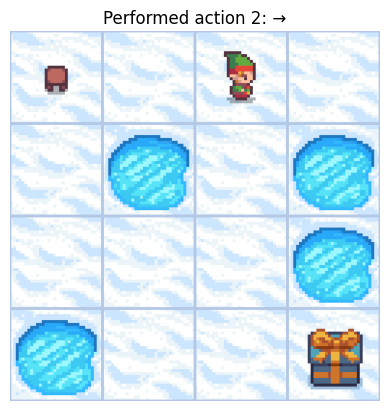

Step 15: Action 3, Observation 2, Reward 0.0


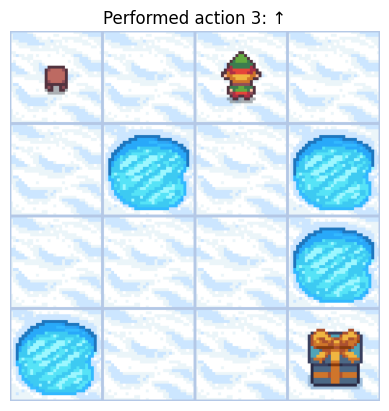

Step 16: Action 3, Observation 2, Reward 0.0


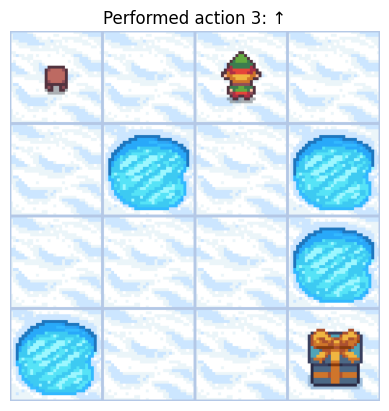

Step 17: Action 2, Observation 3, Reward 0.0


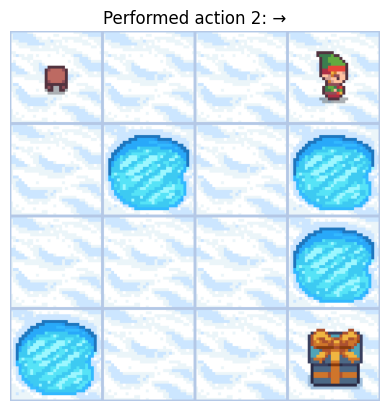

Step 18: Action 0, Observation 2, Reward 0.0


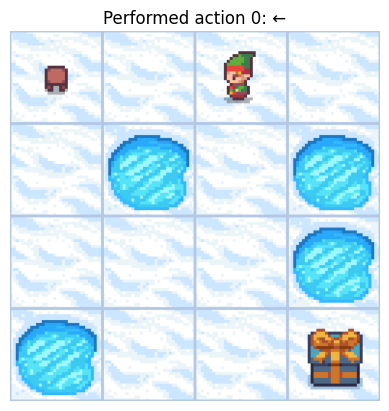

Step 19: Action 0, Observation 1, Reward 0.0


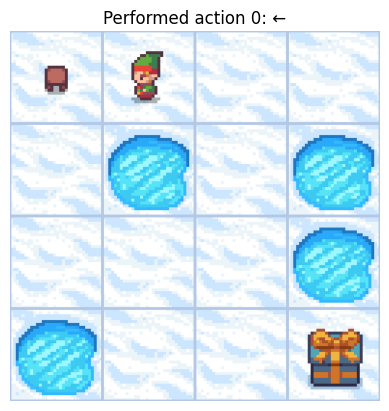

Step 20: Action 0, Observation 0, Reward 0.0


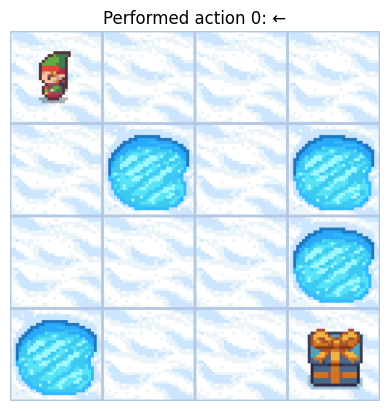

Step 21: Action 3, Observation 0, Reward 0.0


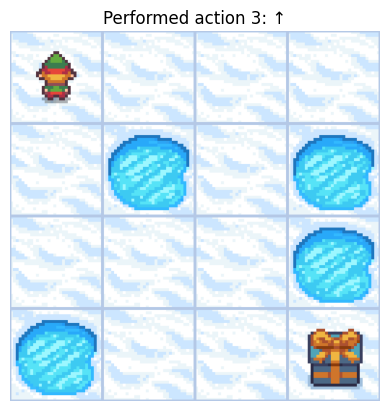

Step 22: Action 1, Observation 4, Reward 0.0


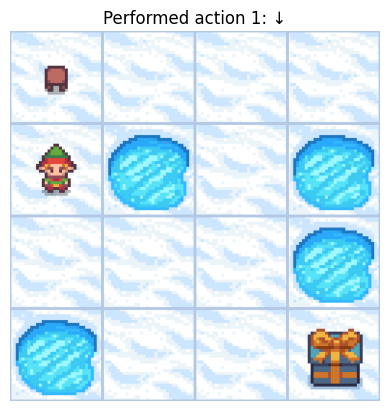

Step 23: Action 2, Observation 5, Reward 0.0


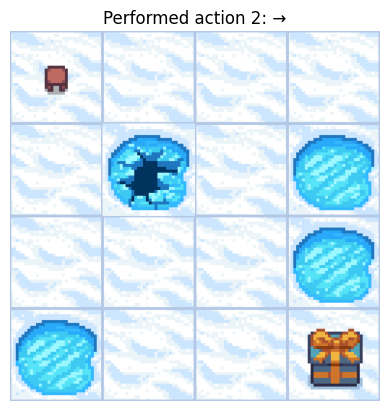

You failed, the water was too hard to see for you <>


In [ ]:
# Map actions to directions
actions_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}

# Create the FrozenLake-v1 environment with rendering enabled
env = gym.make("FrozenLake-v1", render_mode="rgb_array",  is_slippery=False)

# Reset the environment to its initial state
env.reset()

#Greedy policy

steps = 0
done = False

while not done:
    action = random.choice(list(actions_map.keys())) # We choose a random action 
    observation, reward, done, _, _ = env.step(action)
    print(f"Step {steps}: Action {action}, Observation {observation}, Reward {reward}")
    display_frame(env,action)
    steps += 1
    

if reward == 1:
    print("You reached the goal !!!")
else:
    print("You failed, the water was too hard to see for you <>")


This code is chosing randomly an action to try to reach the end. This is our greedy policy.
As we can see, it will fall in the holes a lot of time because there is 4 holes for 1 goal.

In [20]:
env.close()

**Summary of Retrievable Information**

| **Data**                   | **How to Retrieve**                | **Usage**                                   |
|----------------------------|-------------------------------------|--------------------------------------------|
| **State Space**            | `env.observation_space`            | Understand the environment's size.         |
| **Action Space**           | `env.action_space`                 | Know the set of possible actions.          |
| **Transition Probabilities** | `raw_env.P`                      | Analyze stochastic dynamics.               |
| **Rewards**                | `raw_env.P`                        | Understand reward structure.               |
| **Episode Termination (`done`)** | `raw_env.P`                   | Identify terminal states.                  |
| **Grid Layout**            | `raw_env.desc`                     | Visualize the environment.                 |
| **Initial State**          | `env.reset()`                      | Observe the agent's starting position.     |
| **Rendering**              | `env.render()`                     | Debug and visualize agent behavior.        |
| **Episode Information**    | `env.step(action)` (returns `info`) | Monitor performance during an episode.     |

<h2 align="left"> <font color='darkblue'><b> 3. Compute Optimal Policy </b></font></h2>  


The <b>FrozenLake-v1</b> environment presents a challenging grid-based problem where the agent must navigate from the start position to the goal while avoiding holes. This task becomes significantly more complex under stochastic dynamics (<code>is_slippery=True</code>), where the agent's actions may not always result in the intended movement. Instead, the environment introduces randomness, causing the agent to "slip" and move in unintended directions, making planning and decision-making critical.


---

<h3 align="left"> <font color='darkred'><b> Exercice 2: Implement Value Iteration Algorithm </b></font></h3>  

Value Iteration is a fundamental reinforcement learning algorithm used to compute the optimal policy for an environment. It works by iteratively updating the value function for each state based on the expected rewards and the dynamics of the environment. In the case of **FrozenLake-v1** with stochastic dynamics, Value Iteration must account for the uncertainty in transitions, ensuring that the computed policy balances the risks of slipping with the rewards of reaching the goal.



<div style="text-align: center;">
    <img src="images/Value_Iteration.png" width="600" />
</div>

The diagram above illustrates the process of Value Iteration, where the agent evaluates the value of each state iteratively until convergence. The resulting optimal policy guides the agent through the environment, avoiding hazards and maximizing its chances of success despite the stochastic dynamics.

<font color='darkred'><b>Your tasks are:</b></font>
<ol>
    <li>Implement the <b>Value Iteration algorithm</b>. Run the algorithm to obtain the optimal policy for the <b>FrozenLake-v1</b> stochastic environment. How many iterations does the policy need to converge?</li>
    <li>Use the code below to visualize the agent's steps as it navigates the environment based on the derived optimal policy.</li>
    <li>Observe and analyze the agent's performance under deterministic dynamics (<b>is_slippery=False</b>).</li>
</ol>

### 1. implementation of the Value Iteration algorithm

In [21]:
def value_iteration(env, gamma, theta):
    """
    Performs Value Iteration for the FrozenLake-v1 environment to find the optimal policy.

    Parameters:
    - env: The environment object (e.g., FrozenLake-v1). It should have an observation space and action space, 
           and a transition model (raw_env.P).
    - gamma: The discount factor for future rewards (0 < gamma < 1). 
    - theta: The threshold for convergence. The algorithm stops when the change in value function is smaller than this value.
    
    Returns:
    - policy: The optimal policy derived from the value function, where each state has the best action.
    - V: The value function representing the expected return from each state.
    - iterations: The number of iterations required for convergence.

    """
    raw_env = env.unwrapped
    num_states = raw_env.observation_space.n
    num_actions = raw_env.action_space.n

    V = np.zeros(num_states)  # Initialize value function to zero
    iterations = 0  # Counter for the number of iterations
    delta=1 # We put this variable because we want to enter the loop
    while delta>=theta:
        delta = 0  # Change in value function
        for state in range(num_states): # We are running through all the states
            v = V[state]
            action_values = []

            # Calculate value for each action
            for action in range(num_actions): # We are running through all the actions for a given state
                q_value = 0
                for prob, next_state, reward, done in raw_env.P[state][action]: # We are running through all the probabilities for a given action (if slippery = True there are 3 else there is 1)
                    q_value += prob * (reward + gamma * V[next_state])
                action_values.append(q_value)

            # Update state value with max Q-value
            V[state] = max(action_values)
            delta = max(delta, abs(v - V[state]))  # Update delta

        iterations += 1  # Increment the iteration counter

    # Extract policy
    policy = np.zeros(num_states, dtype=int)
    for state in range(num_states):
        action_values = []
        for action in range(num_actions):
            q_value = 0
            for prob, next_state, reward, done in raw_env.P[state][action]:
                q_value += prob * (reward + gamma * V[next_state])
            action_values.append(q_value)
        policy[state] = np.argmax(action_values) # We take the index of the maximum qvalue to now the best action

    return policy, V, iterations

In [22]:
# Initialize the FrozenLake environment
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=True)

# Hyperparameters
gamma = 0.99  # Discount factor
theta = 1e-6  # Convergence threshold

# Perform Value Iteration
start_time = time.time()  # Start timing
optimal_policy,optimal_values,  num_iterations = value_iteration(env, gamma, theta)
end_time = time.time()  # End timing

execution_time = end_time - start_time

print("Optimal Value Function:")
print(optimal_values.reshape(4, 4))

print("\nOptimal Policy (actions):")
actions_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}
policy_grid = np.array([actions_map[action] for action in optimal_policy]).reshape(4, 4)
print(policy_grid)

print(f"\nNumber of iterations to converge: {num_iterations}")
print(f"Resolution Time: {execution_time:.4f} seconds")

# Close the environment
env.close()



Optimal Value Function:
[[0.54201404 0.49878743 0.47067727 0.45683193]
 [0.5584404  0.         0.35834012 0.        ]
 [0.59179013 0.64307363 0.61520214 0.        ]
 [0.         0.74171617 0.86283528 0.        ]]

Optimal Policy (actions):
[['←' '↑' '↑' '↑']
 ['←' '←' '←' '←']
 ['↑' '↓' '←' '←']
 ['←' '→' '↓' '←']]

Number of iterations to converge: 228
Resolution Time: 0.0690 seconds


This code is implementing the value iteration algorithm and print the optimal policy and value that our character will use to find the goal. In the case with "is_slippery"=False he converge with 7 iterations. 

### 2. analyse the agent steps


Simulating the agent's steps:


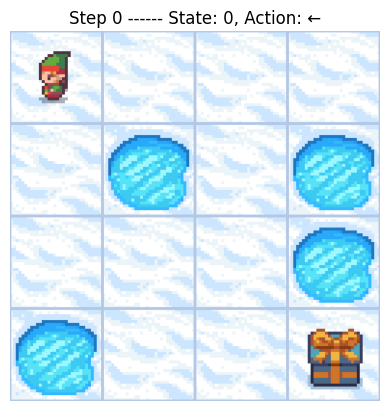

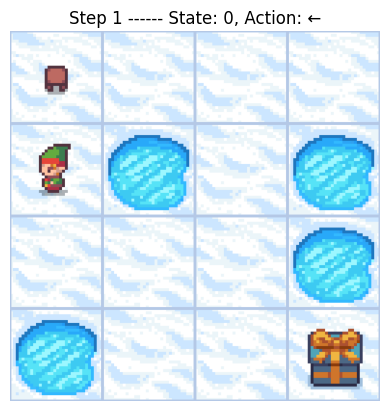

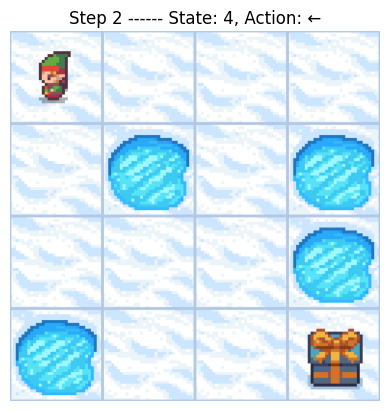

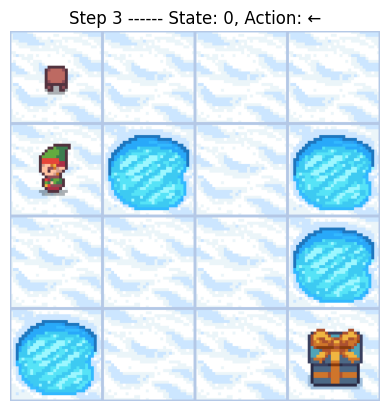

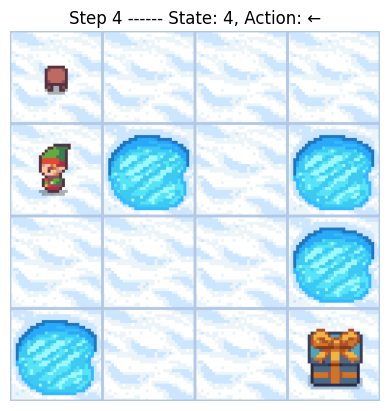

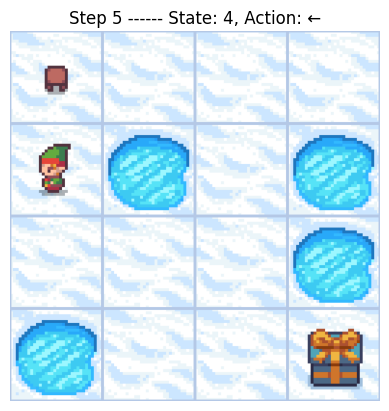

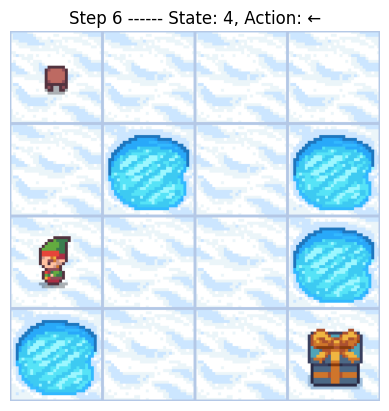

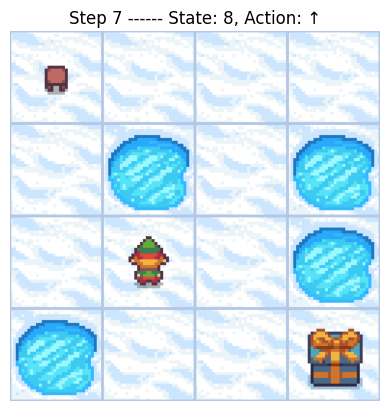

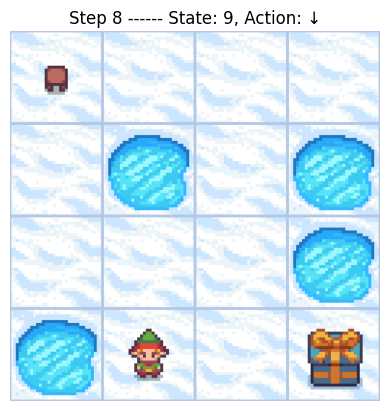

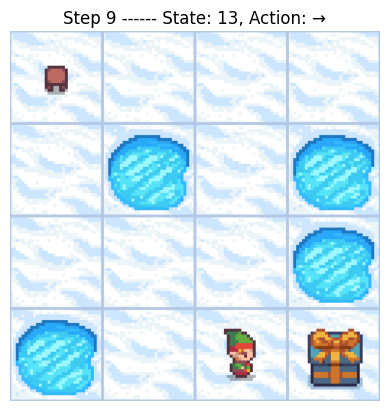

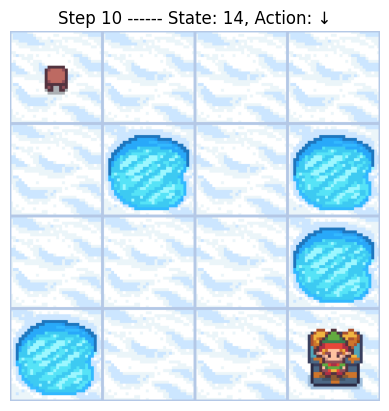


Final State: 15, Reward: 1.0
Number of steps used: 11


In [23]:
import matplotlib.pyplot as plt

# Visualization: Simulate the environment using the derived policy
state = env.reset()[0]
done = False

print("\nSimulating the agent's steps:")
steps = 0
while not done:
    # Take the action based on the optimal policy
    action = optimal_policy[state]
    new_state, reward, done, _, _ = env.step(action)

    # Render the environment and display steps
    img = env.render()
    plt.imshow(img)

    plt.title(f"Step {steps} ------ State: {state}, Action: {actions_map[action]}")
    plt.axis('off')
    plt.show()

    # Transition to the new state
    state = new_state
    steps = steps + 1

# Final reward and state
print(f"\nFinal State: {state}, Reward: {reward}")
print(f"Number of steps used: {steps}")
env.close()

### 3. Analyse of our result

With "is_slippery"=False it reach the goal in 6 moves which is the optimal solution. Here he finds the fastest way to reach the goal with very few iterations.

With "is_slippery"=True it can reach the end but it can also falls in the water. We explain that because even with our algorithm there is an important random part to know if he will do the action ask or another one. For instance he reaches the goal state with 78 steps sometimes and other times can find it in 15 moves.



---

<h3 align="left"> <font color='white'><b> Exercice 3: Implement Policy Iteration Algorithm </b></font></h3>  

<p>
The <b>Policy Iteration</b> algorithm is an iterative approach used to compute the optimal policy for a Markov Decision Process (MDP). It alternates between two steps:
</p>

<ul>
    <li><b>Policy Evaluation</b>: Computes the value function for a fixed policy by iteratively updating state values.</li>
    <li><b>Policy Improvement</b>: Updates the policy by selecting the action that maximizes the expected value for each state.</li>
</ul>

<p>
This process continues until the policy becomes stable, meaning further iterations do not result in any changes.
</p>

<div style="text-align: center;">
    <img src="images/Policy_Iteration_.png" width="400" />
</div>

<p>
The diagram above illustrates the iterative nature of Policy Iteration, combining evaluation and improvement steps to converge to the optimal policy.
</p>

<font color='white'><b>Your tasks are:</b>
<ol>
    <li>Implement the <b>Policy Iteration algorithm</b> as a function. Run the algorithm to obtain the optimal policy for the <b>FrozenLake-v1</b> stochastic environment. How many iterations does the policy need to converge?</li>
</ol>
</font>


In [24]:
def policy_iteration(env, gamma, theta):
    """
    Performs Policy Iteration for the FrozenLake-v1 environment to find the optimal policy.

    Parameters:
    - env: The environment object (e.g., FrozenLake-v1). It should have an observation space and action space, 
           and a transition model (raw_env.P).
    - gamma: The discount factor for future rewards (0 < gamma < 1). 
    - theta: The threshold for convergence. The algorithm stops when the change in value function is smaller than this value.
    
    Returns:
    - policy: The optimal policy derived from the value function, where each state has the best action.
    - V: The value function representing the expected return from each state.
    - iterations: The number of iterations required for convergence.
    """
    raw_env = env.unwrapped
    num_states = raw_env.observation_space.n
    num_actions = raw_env.action_space.n
    policy = np.zeros(num_states, dtype=int)

    V = np.zeros(num_states)  # Initialize value function to zero
    iterations = 0  # Counter for the number of iterations
    delta=1 # We put this variable because we want to enter the loop

    while True :
        # Policy_evaluation
        while delta>=theta:
            delta = 0  # Change in value function
            for state in range(num_states): # We are running through all the states
                v = V[state]
                action=policy[state]
                q_value=0
                for prob, next_state, reward, done in raw_env.P[state][action]: # We are running through all the probabilities for a given action (if slippery = True there are 3 else there is 1)
                    q_value += prob * (reward + gamma * V[next_state])

                # Update state value with max Q-value
                V[state] = q_value
                delta = max(delta, abs(v - V[state]))  # Update delta
            #print(V.reshape(4, 4))

        # Extract policy
        policy_stable=True
        for state in range(num_states):
            action_values = []
            curent_state = policy[state]

            for action in range(num_actions):
                q_value = 0
                for prob, next_state, reward, done in raw_env.P[state][action]:
                    q_value += prob * (reward + gamma * V[next_state])
                action_values.append(q_value)
            policy[state] = np.argmax(action_values) # We take the index of the maximum qvalue to know the best action
            
            if(policy[state]!=curent_state): 
                policy_stable=False

        iterations += 1  # Increment the iteration counter

        if(policy_stable):
            break
        else:
            delta = 1 # to comeback to policy evaluation  

        

    return policy, V, iterations

In [25]:
# Initialize the FrozenLake environment
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=True)

# Hyperparameters
gamma = 0.99  # Discount factor
theta = 1e-6  # Convergence threshold


# Perform Value Iteration
start_time = time.time()  # Start timing
optimal_policy2,optimal_values2,  num_iterations2= policy_iteration(env, gamma, theta)
end_time = time.time()  # End timing

execution_time2 = end_time - start_time

print("Optimal Value Function:")
print(optimal_values2.reshape(4, 4))

print("\nOptimal Policy (actions):")
actions_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}
policy_grid2 = np.array([actions_map[action] for action in optimal_policy2]).reshape(4, 4)
print(policy_grid2)

print(f"\nNumber of iterations to converge: {num_iterations2}")
print(f"Resolution Time: {execution_time2:.4f} seconds")
# Close the environment
env.close()

Optimal Value Function:
[[0.54201384 0.49878716 0.47067695 0.45683159]
 [0.55844022 0.         0.35833998 0.        ]
 [0.59178998 0.64307352 0.61520205 0.        ]
 [0.         0.7417161  0.86283524 0.        ]]

Optimal Policy (actions):
[['←' '↑' '↑' '↑']
 ['←' '←' '←' '←']
 ['↑' '↓' '←' '←']
 ['←' '→' '↓' '←']]

Number of iterations to converge: 7
Resolution Time: 0.0350 seconds


Using the policy iteration, our algorithm converge in 7 iterations with "is_slippery"=False and "is_slippery"=True.
The only differents between both is the Resolution time it's taking


Simulating the agent's steps:


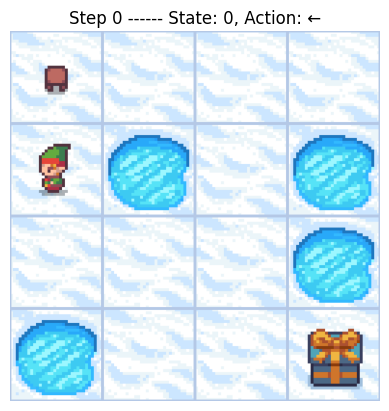

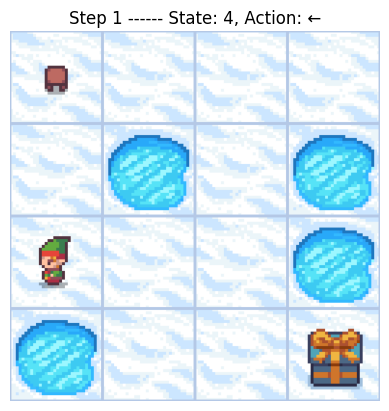

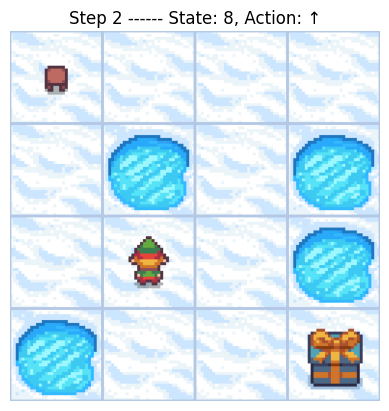

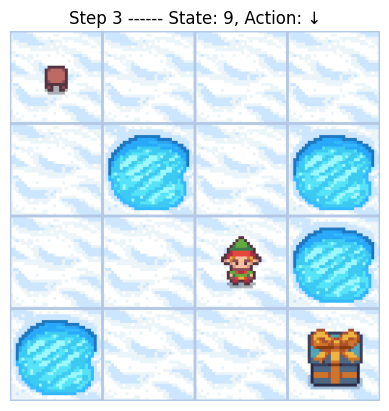

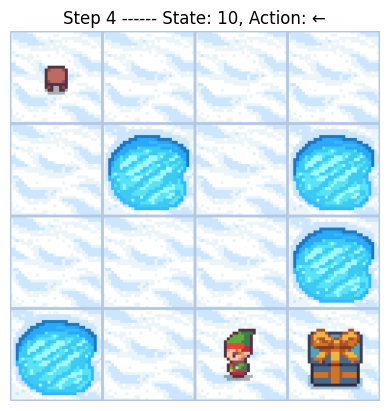

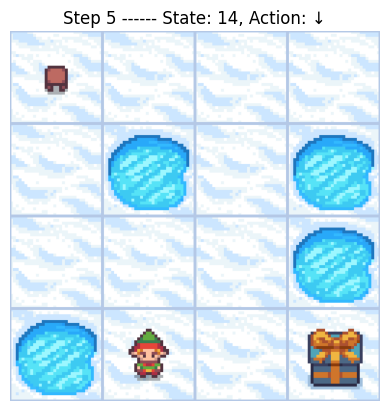

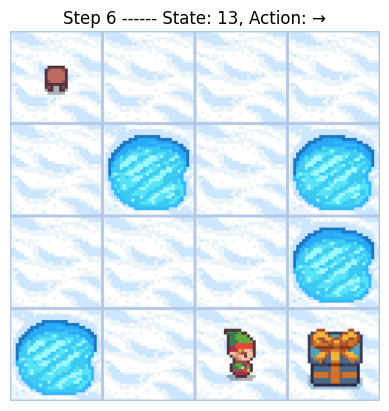

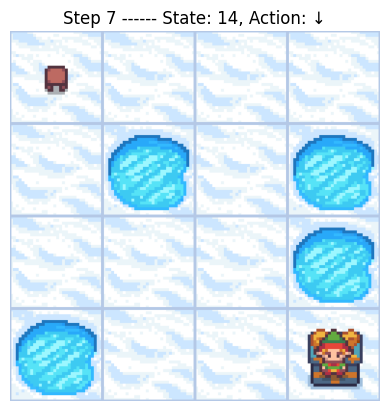


Final State: 15, Reward: 1.0
Number of steps used: 8


In [26]:
import matplotlib.pyplot as plt

# Visualization: Simulate the environment using the derived policy
state = env.reset()[0]
done = False

print("\nSimulating the agent's steps:")
steps = 0
while not done:
    # Take the action based on the optimal policy
    action = optimal_policy2[state]
    new_state, reward, done, _, _ = env.step(action)

    # Render the environment and display steps
    img = env.render()
    plt.imshow(img)

    plt.title(f"Step {steps} ------ State: {state}, Action: {actions_map[action]}")
    plt.axis('off')
    plt.show()

    # Transition to the new state
    state = new_state
    steps = steps + 1

# Final reward and state
print(f"\nFinal State: {state}, Reward: {reward}")
print(f"Number of steps used: {steps}")
env.close()

With "is_slippery"=False it reach the goal in 6 moves which is the optimal solution but with "is_slippery"=True it can reach the end but it can also fall in the water. We explain that because even with our algorithm there is an important random part. For instance he reach the goal state with 78 steps sometimes and other times can find it in 15 moves.

<h3 align="left"> <font color='white'><b> Exercise 4: Implement Q-Learning Algorithm </b></font></h3>  

<p>
Q-Learning is an off-policy reinforcement learning algorithm that estimates <b>Q-values</b>  (state-action values) to derive an optimal policy. The algorithm balances exploration (discovering new actions) and exploitation (choosing the best-known actions) through the use of an epsilon-greedy policy.
</p>

<div style="text-align: center;">
    <img src="images/Q_Learning.png" width="600" />
</div>


<p>
In this exercise, you will implement the <b>Q-Learning algorithm</b> for the <b>FrozenLake-v1</b> environment, which involves stochastic dynamics (<code>is_slippery=True</code>). Your goal is to enable the agent to learn the optimal policy over episodes while balancing exploration and exploitation.
</p>

<p>
Some key concepts related to this algorithm have been discussed in the course. For elements that were not explicitly covered, you are encouraged to conduct your own research and deepen your understanding of how Q-Learning works in practice.
</p>



<font color='white'><b>Your tasks are:</b>
<ol>
    <li>Implement the <b>Q-Learning algorithm</b> using the epsilon-greedy exploration strategy.</li>
    <li>Train the agent for a sufficient number of episodes (e.g., 50,000) and observe how the performance improves over time.</li>
    <li>Visualize the learned Q-table and the optimal policy derived from it. Interpret the results.</li>
    <li>Experiment with different epsilon decay rates and learning rates (<code>alpha</code>) to see how they affect the agent's performance.</li></font>
</ol>

### 1. Impementation of the Q_Learning algorithm

In [27]:
def Q_learning(env,gamma=0.99, alpha=0.1, epsilon = 1.0,num_episodes = 50000,max_step = 50,epsilon_decay=0.999,epsilon_min=0.1):
    """
    Performs Q-learning for the FrozenLake-v1 environment to find the optimal policy.

    Parameters:
    - env: The environment object (e.g., FrozenLake-v1). It should have an observation space and action space,
           and a step function for interaction with the environment.
    - gamma: The discount factor for future rewards (0 < gamma < 1).
    - alpha: The learning rate for Q-value updates (0 < alpha <= 1).
    - epsilon: The exploration rate for the epsilon-greedy policy (0 <= epsilon <= 1).
    - num_episodes: The number of episodes to run the Q-learning algorithm.
    - max_step: The maximum number of steps per episode.
    - epsilon_decay: The decay factor for epsilon, which controls how quickly exploration reduces.
    - epsilon_min: The minimum value for epsilon, ensuring some exploration is always allowed.
    
    Returns:
    - policy: The optimal policy derived from the Q-values, where each state has the best action.
    - Q: The Q-table (action-value function), representing the expected return from each state-action pair.
    - total_rewards: A list of the cumulative rewards for each episode.
    """
    raw_env = env.unwrapped
    num_states = raw_env.observation_space.n
    num_actions = raw_env.action_space.n
    Q = np.zeros((num_states,num_actions))  # Initialize Q-table function to zero    
    total_reward = 0
    total_rewards = []
    
    for episode in range(num_episodes):

        step = 0 # We use a step because sometimes it would take too much time to converge
        state,_ = env.reset() 
        terminated = False
        while not terminated and step<max_step:    

            # Choose an action using epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore: random action
            else:
                action = np.argmax(Q[state])  # Exploit: best known action

            next_state,reward,terminated, _, _ = env.step(action)
             # Q-value update
            if terminated:
                Q[state, action] += alpha * (reward - Q[state, action])
            else:
                Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

           
            total_reward += reward
            state = next_state
            step += 1
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        total_rewards.append(total_reward)
    policy = np.argmax(Q,axis=1) # Take the index of the best value to know which actions did it
        

    return policy,Q,total_rewards

### 2. 3. train the agent and interpretation of the result

In [28]:
# Initialize the FrozenLake environment
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=True)

# Perform Value Iteration
start_time = time.time()  # Start timing
optimal_policy3,optimal_values3,total_rewards3= Q_learning(env)
end_time = time.time()  # End timing

execution_time3 = end_time - start_time

print("Optimal Value Function:")
print(optimal_values3)

print("\nOptimal Policy (actions):")
actions_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}
policy_grid3 = np.array([actions_map[action] for action in optimal_policy3]).reshape(4, 4)
print(policy_grid3)

print(f"Resolution Time: {execution_time3:.4f} seconds\n")
for i,reward in enumerate(total_rewards3) :
    print(f"episode {i} the curent reward was {reward}")

# Close the environment
env.close()


Optimal Value Function:
[[0.54947738 0.46993669 0.47502247 0.47599173]
 [0.30594277 0.29104659 0.2785406  0.4579504 ]
 [0.41340828 0.4112812  0.39571581 0.42845441]
 [0.2589614  0.27418341 0.31559614 0.41501985]
 [0.57630419 0.31246195 0.29596895 0.42276435]
 [0.         0.         0.         0.        ]
 [0.2537104  0.1136133  0.37611868 0.16740614]
 [0.         0.         0.         0.        ]
 [0.33766347 0.44957849 0.37801938 0.61467826]
 [0.44685587 0.67439951 0.46912855 0.32492555]
 [0.64325035 0.41929462 0.35213886 0.28576529]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.46828262 0.57216767 0.75705774 0.45586431]
 [0.72068292 0.84711246 0.7344026  0.77629237]
 [0.         0.         0.         0.        ]]

Optimal Policy (actions):
[['←' '↑' '↑' '↑']
 ['←' '←' '→' '←']
 ['↑' '↓' '←' '←']
 ['←' '→' '↓' '←']]
Resolution Time: 58.8222 seconds

episode 0 the curent reward was 0.0
episode 1 the curent reward was 0.0
episode 2 the

Here we have a different optimal value fonction because here we don't only have the 16 states, we have 4 action for each states. The values of the first state are like this [0.94148015 0.95099005 0.95099005 0.94148015] it means that for the first action (0 : '←') it's 0.94148015 and the second action (1 : '↓') it's 0.95099005. 
The optimal policy array will choose the biggest value of each action for each state to find the best move.

With this configuration alpha=0.1, epsilon = 1.0,num_episodes = 50000,max_step = 50,epsilon_decay=0.999 and epsilon_min=0.1 the execution time is 11.4 s. 

High values: Indicate states with proximity to the goal and safer paths.
Low values: Indicate states far from the goal, near holes , or less rewarding paths.
We can see that in the case of is "is_slippery"=True the values are high when it's closed to the goal even with the fact that there is random but when they are really closed to the holes the value are low because there is a lot of risk.
Our algorithm find the best moves to avoid to fall in the holes.    


Simulating the agent's steps:


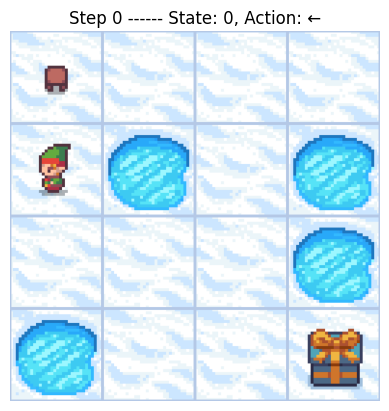

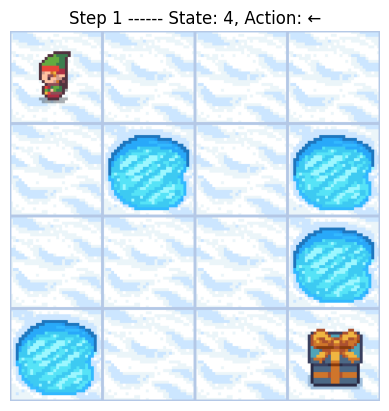

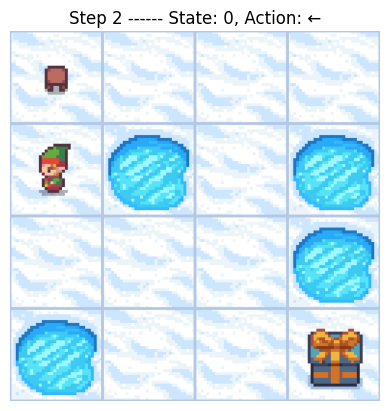

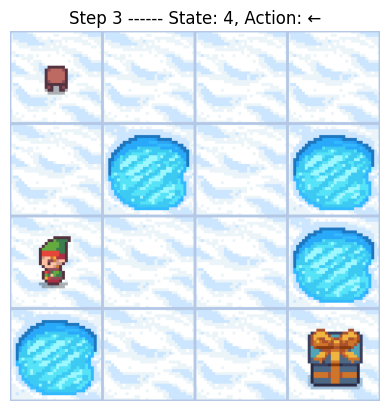

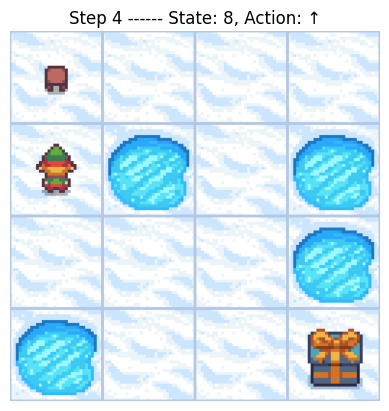

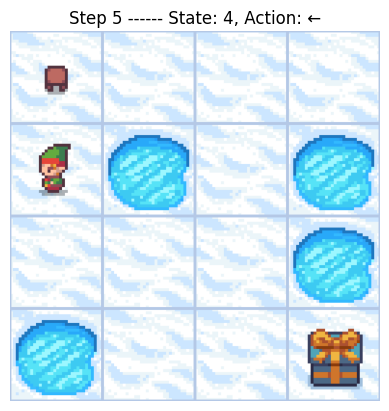

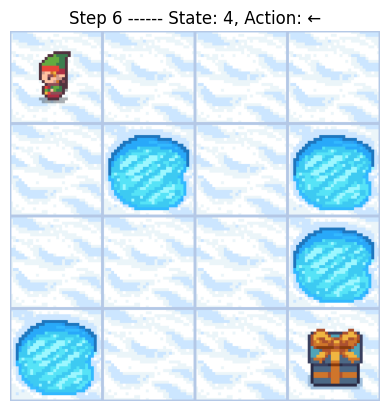

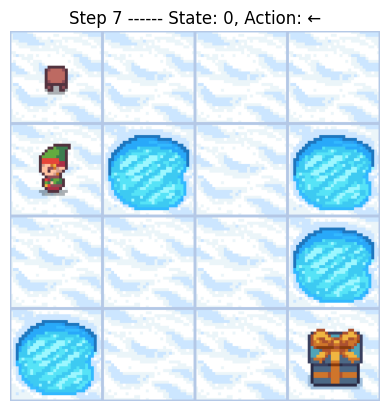

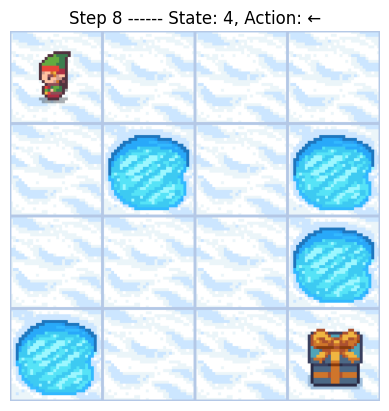

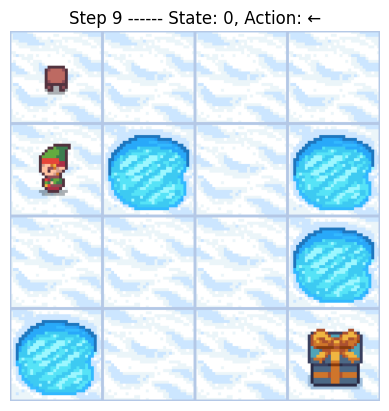

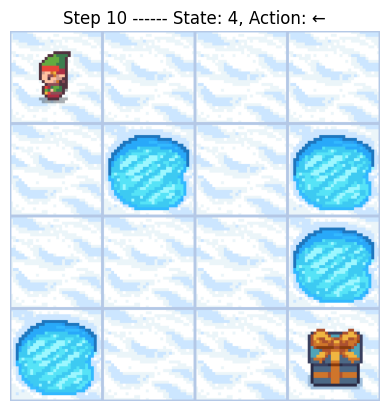

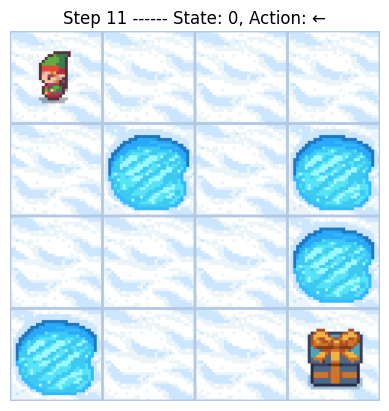

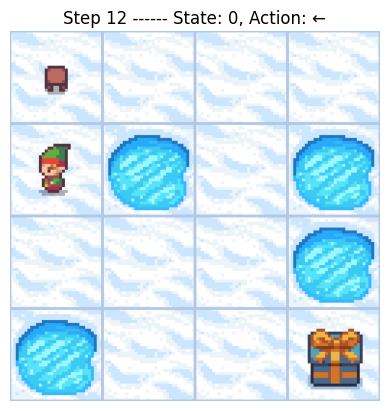

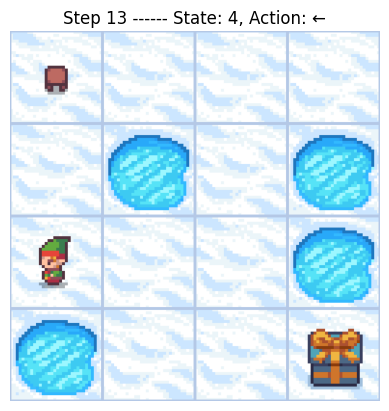

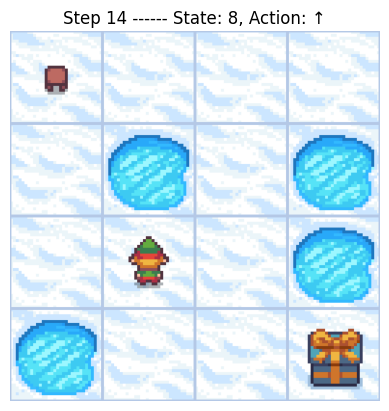

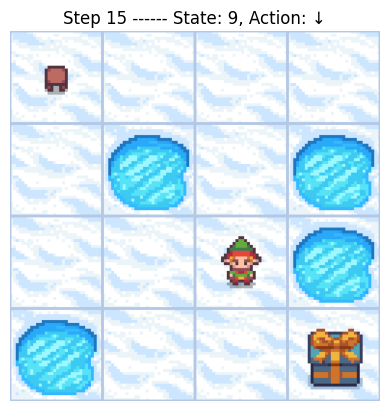

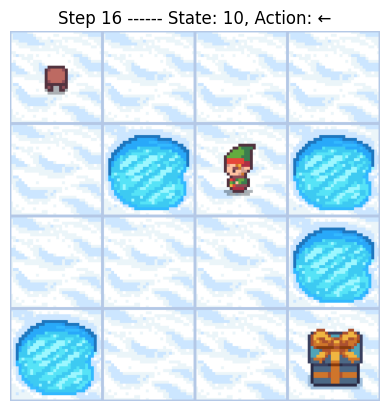

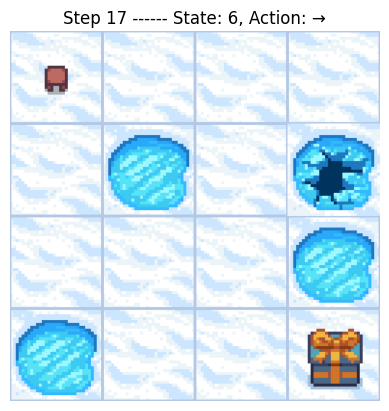


Final State: 7, Reward: 0.0
Number of steps used: 18


In [29]:
import matplotlib.pyplot as plt

# Visualization: Simulate the environment using the derived policy
state = env.reset()[0]
done = False

print("\nSimulating the agent's steps:")
steps = 0
while not done:
    # Take the action based on the optimal policy
    action = optimal_policy3[state]
    new_state, reward, done, _, _ = env.step(action)

    # Render the environment and display steps
    img = env.render()
    plt.imshow(img)

    plt.title(f"Step {steps} ------ State: {state}, Action: {actions_map[action]}")
    plt.axis('off')
    plt.show()

    # Transition to the new state
    state = new_state
    steps = steps + 1

# Final reward and state
print(f"\nFinal State: {state}, Reward: {reward}")
print(f"Number of steps used: {steps}")
env.close()

With "is_slippery"=False it still reach the goal in 6 moves which is the optimal solution 

With "is_slippery"=True it succeeds to reach the goal often, this code is good to minimise the fall in the holes.

### 4. Experiment with different epsilon decay rates and learning rate

In [37]:
def apply_algorithm(alpha, epsilon_decay):
    """
    Applies Q-learning algorithm on the FrozenLake environment and measures execution time.

    Parameters:
    - alpha: The learning rate for the Q-learning algorithm (0 < alpha <= 1).
    - epsilon_decay: The decay factor for epsilon, controlling how fast exploration decreases.

    Returns:
    - optimal_policy: The optimal policy derived from the Q-values.
                       It indicates the best action to take at each state.
    - optimal_values: The Q-table , representing the action-value function (Q-values) 
                      for each state-action pair.
    - execution_time: The total time taken to run the Q-learning algorithm.
                      It gives an indication of how long the algorithm took to converge.
    - total_reward :  The total reward accumulated over 100 test episodes.
                      It gives an indication if how well the learned policy performs.
    """
    env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=True)

    # Perform Value Iteration
    start_time = time.time()  # Start timing
    optimal_policy, optimal_values, total_rewards = Q_learning(env, alpha=alpha, epsilon_decay=epsilon_decay)
    end_time = time.time()  # End timing

    execution_time = end_time - start_time

    # Count the number of times he reach the goals on 100 episodes
    nb_episodes = 100
    total_reward = 0
    for episode in range(nb_episodes): 
        steps = 0
        state = env.reset()[0]
        done = False
        while not done:
            # Take the action based on the optimal policy
            action = optimal_policy[state]
            new_state, reward, done, _, _ = env.step(action)

            # Transition to the new state
            state = new_state
            steps = steps + 1

        total_reward+=reward

    # Close the environment
    env.close()

    return optimal_policy, optimal_values, execution_time, total_reward

In [38]:
from IPython.display import display, HTML
import ipywidgets as widgets

def display_results(epsilon_decays, alphas):
    results = []

    for epsilon_decay in epsilon_decays:
        for alpha in alphas:
            optimal_policy, optimal_values, execution_time,total_reward = apply_algorithm(alpha=alpha, epsilon_decay=epsilon_decay)
            policy_grid = np.array([actions_map[action] for action in optimal_policy]).reshape(4, 4)
            results.append({
                "alpha": alpha,
                "epsilon_decay": epsilon_decay,
                "execution_time": execution_time,
                "optimal_policy": policy_grid,
                "optimal_values": optimal_values,
                "total_reward": total_reward
            })

    # Create a table widget
    rows = []
    for result in results:
        alpha = result["alpha"]
        epsilon_decay = result["epsilon_decay"]
        execution_time = f"{result['execution_time']:.4f} s"
        total_reward = result["total_reward"]

        # Create a button to display details
        button = widgets.Button(
            description="Show Details",
            button_style="info",
            tooltip=f"α: {alpha}, ε_decay: {epsilon_decay}"
        )

        def on_button_click(change, res=result):
            with output:
                output.clear_output()
                print(f"Details for α={res['alpha']} and ε_decay={res['epsilon_decay']}\n")
                print("Optimal Policy (actions):")
                print(res["optimal_policy"])
                print("\nOptimal Values:")
                print(np.round(res["optimal_values"], 3))
                print(f"\nExecution Time: {res['execution_time']:.4f} seconds")

        button.on_click(on_button_click)

        rows.append([
            alpha,
            epsilon_decay,
            execution_time,
            total_reward,
            button
        ])

    # Create a VBox for the table
    header = widgets.HBox([widgets.Label("α", layout=widgets.Layout(width="50px")),
                           widgets.Label("ε_decay", layout=widgets.Layout(width="100px")),
                           widgets.Label("Execution Time", layout=widgets.Layout(width="150px")),
                           widgets.Label("Number of rewards for 100 episodes", layout=widgets.Layout(width="200")),
                           widgets.Label("Details", layout=widgets.Layout(width="100px"))])
    table = widgets.VBox([header] + [widgets.HBox([widgets.Label(str(col), layout=widgets.Layout(width="100px")) if not isinstance(col, widgets.Widget) else col for col in row]) for row in rows])

    global output
    output = widgets.Output()
    display(table, output)

    # Actions mapping for display
actions_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}

# Define parameters
epsilon_decays = [0.9, 0.95, 0.99]
alphas = [0.01, 0.1, 0.5]

# Display the results
display_results(epsilon_decays, alphas)

Output()

Summary of Effects on Performance:

Epsilon Decay:
Faster decay → Faster exploitation but potentially suboptimal policies.
Slower decay → Longer exploration phase but more robust and optimal policy discovery.

Learning Rate (alpha):
High alpha → Faster learning but possible instability.
Low alpha → Slower learning but more stability in the learned policy.

---

<h3 align="left"> <font color='white'><b> Exercice 5: Compare the Policies </b></font></h3>  

<p>
This exercice focuses on comparing the performance of the <b>Value Iteration</b>, <b>Policy Iteration</b>, and <b>Q-Learning</b> algorithms. Evaluate their convergence speed and performance.
</p>

<font color='white'><b>Your tasks are:</b>
<ol>
    <li>Compare the policies derived from Value Iteration, Policy Iteration, and Q-Learning. How do they differ?</li>
    <li>Evaluate the convergence speed of each algorithm. Which algorithm converges faster, and why?</li>
    <li>Analyze the computational complexity of each algorithm and discuss their strengths and limitations.</li>
</ol>
</font>

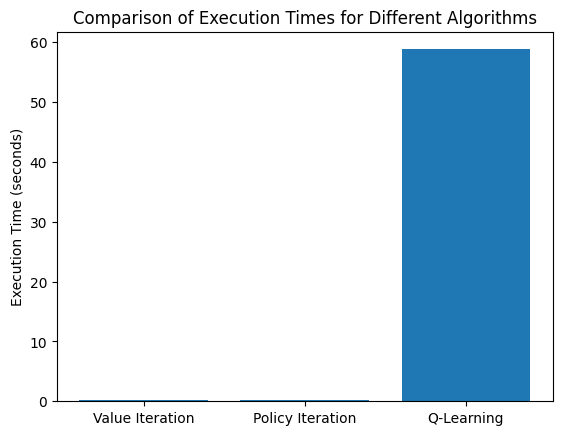

In [39]:
# Assuming you have the execution times for each algorithm
execution_times = {
    "Value Iteration": execution_time,  
    "Policy Iteration": execution_time2, 
    "Q-Learning": execution_time3,  
}

# Plotting the execution times
algorithms = list(execution_times.keys())
times = list(execution_times.values())

plt.bar(algorithms, times)
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times for Different Algorithms')
plt.show()


TypeError: Image data of dtype <U1 cannot be converted to float

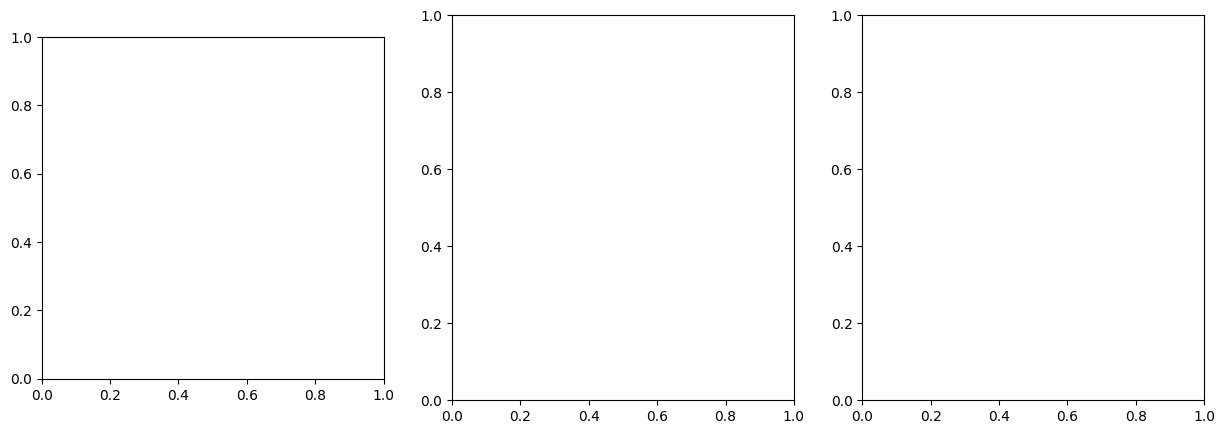

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the policies for each algorithm
# Policy derived from Value Iteration, Policy Iteration, Q-Learning, etc.
policies = {
    "Value Iteration": optimal_policy,  
    "Policy Iteration": optimal_policy2,  
    "Q-Learning": optimal_policy3, 
}

fig, axes = plt.subplots(1, len(policies), figsize=(15, 5))

for i, (name, policy) in enumerate(policies.items()):
    ax = axes[i]
    ax.imshow(policy.reshape(4, 4), cmap='cool', interpolation='nearest')  # 4x4 grid visualization
    ax.set_title(f"{name} Policy")
    ax.axis('off')  # Hide axis for better visualization

plt.show()


---

<h3 align="left"> <font color='white'><b> Exercice 6: Consider Bigger Environment </b></font></h3>  

<p>
Extend your analysis by running the <b>Value Iteration</b> and <b>Policy Iteration</b> algorithms on a larger grid-based environment, <b>FrozenLake8x8-v1</b>.
</p>

<font color='white'><b>Your tasks are:</b>
<ol>
    <li>Run Value Iteration and Policy Iteration algorithms on <b>FrozenLake8x8-v1</b>. Compare their convergence speeds with the results from <b>FrozenLake-v1</b>.</li>
    <li>Analyze how the increased grid size affects the performance and computational requirements of each algorithm.</li>
</ol></font>

### 1. Compare algorithm on different environments

In [36]:
# Let's compare our algorithm on 100 episodes to see who win the most
nb_episodes = 100
average_step = []
total_reward = 0
average_step2=[]
total_reward2=0

# Hyperparameters
gamma = 0.99  # Discount factor
theta = 1e-6  # Convergence threshold
env = gym.make('FrozenLake8x8-v1', is_slippery=True)

# Perform Value Iteration
start_time = time.time()  # Start timing
optimal_policy,optimal_values,  num_iterations = value_iteration(env, gamma, theta)
end_time = time.time()  # End timing
execution_time = end_time - start_time

# Perform Value Iteration
start_time = time.time()  # Start timing
optimal_policy2,optimal_values2,  num_iterations2= policy_iteration(env, gamma, theta)
end_time = time.time()  # End timing
execution_time2 = end_time - start_time


for episode in range(nb_episodes): 
    steps = 0
    state = env.reset()[0]
    done = False
    while not done:
        # Take the action based on the optimal policy
        action = optimal_policy[state]
        new_state, reward, done, _, _ = env.step(action)

        # Transition to the new state
        state = new_state
        steps = steps + 1

    total_reward+=reward
    average_step.append(steps)

    steps = 0
    state = env.reset()[0]
    done = False
    while not done:
        # Take the action based on the optimal policy
        action = optimal_policy2[state]
        new_state, reward, done, _, _ = env.step(action)

        # Transition to the new state
        state = new_state
        steps = steps + 1

    total_reward2+=reward
    average_step2.append(steps)
    

print(f'Value iteration: number of iterations = {num_iterations}')
print(f'Value iteration: number of wins over {nb_episodes} episodes = {total_reward}')
print(f'Value iteration: average reward over {nb_episodes} episodes = {total_reward/nb_episodes:.3f}')
print(f'Value iteration: average step for one episode = {np.mean(average_step)}')
print(f'Value iteration: execution time = {execution_time:.4f} \n')


print(f'Policy iteration: number of iterations = {num_iterations2}')
print(f'Policy iteration: number of wins over {nb_episodes} episodes = {total_reward2}')
print(f'Policy iteration: average reward over {nb_episodes} episodes = {total_reward2/nb_episodes:.3f}')
print(f'Policy iteration: average step for one episode = {np.mean(average_step2)}')
print(f'Policy iteration: execution time = {execution_time2:.4f} \n')

env.close()


Value iteration: number of iterations = 253
Value iteration: number of wins over 100 episodes = 84.0
Value iteration: average reward over 100 episodes = 0.840
Value iteration: average step for one episode = 88.57
Value iteration: execution time = 0.2698 

Policy iteration: number of iterations = 11
Policy iteration: number of wins over 100 episodes = 88.0
Policy iteration: average reward over 100 episodes = 0.880
Policy iteration: average step for one episode = 80.23
Policy iteration: execution time = 0.2319 



#### For policy iteration : 
Frozen lake 4*4 v1 : 
Number of iterations to converge: 7
Resolution Time: 0.0350 seconds

Frozen lake 8*8 V1 : 
Number of iterations to converge: 11
Resolution Time: 0.6976 seconds

Policy Iteration scales well in terms of iterations but experiences a notable increase in resolution time for larger environments, reflecting the computational cost of evaluating and improving the policy over a larger state space.


#### For Value iteration : 
Frozen lake 4*4 v1 : 
Number of iterations to converge: 228
Resolution Time: 0.0690 seconds

Frozen lake 8*8 V1 : 
Number of iterations to converge: 253
Resolution Time: 1.1643 seconds


Value Iteration shows a noticeable increase in both iterations and execution time as the environment grows. The algorithm becomes more computationally expensive with larger state spaces, requiring both more iterations and longer resolution times.

#### Conclusion : 
The difference is close for both algorithms. Indeed the Resolution time was 2 times bigger between the 4 * 4 and the 8 * 8. Even the number of iterations is proportionnal





### 2. compare both result of each algorithms

Policy Iteration converges significantly faster due to its direct updates to the policy, compared to the state-value updates in Value Iteration. Policy Iteration performs slightly better in terms of overall success rate.Policy Iteration delivers a higher average reward, reflecting its superior policy.
Both methods produce similar step counts, showing that the efficiency of the policies is comparable.

Overall, Policy Iteration outperforms Value Iteration in both performance and computational efficiency in this scenario.